## <center> LAB 5: Boston House Price Prediction with Hyperparameter Tuning </center>

### 205229103

### Arzoo Sah

**Import modules**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

**1.Load dataset and view the dataset**

You are given the dataset with a file name: Lab05_dataset_boston.csv. Load the CSV file and view the
sample values.

In [ ]:
train = pd.read_csv('lab05_dataset_baston.csv')
test = pd.read_csv('lab05_test_baston.csv')

In [ ]:
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2


In [ ]:
test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [ ]:
print(train.shape)
print(test.shape)

(404, 14)
(102, 13)


In [ ]:
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


**2.Split the dataset**

In [ ]:
X = train.drop('MEDV',axis=1)
y = train.MEDV

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,test_size=0.25)

**3.Model training**

### Define the model

In [ ]:
model = Sequential()
model.add(Dense(64,input_dim=13,activation='relu'))
model.add(Dense(1))

### compile the model

with RMSprop optimizer, mean square error loss and mean absolute error metrics

In [ ]:
model.compile(loss='mean_squared_error',optimizer='RMSprop',metrics=['mean_absolute_error'])

### Fit the model

with epochs=10, batch_size=30, verbose = 1

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=30,verbose=1)

Epoch 1/10
11/11 [==============================] - 0s 1ms/step - loss: 29500.6074 - mean_absolute_error: 164.5105
Epoch 2/10
11/11 [==============================] - 0s 1ms/step - loss: 7731.1040 - mean_absolute_error: 81.5882
Epoch 3/10
11/11 [==============================] - 0s 1ms/step - loss: 1733.8926 - mean_absolute_error: 35.1325
Epoch 4/10
11/11 [==============================] - 0s 1ms/step - loss: 448.9497 - mean_absolute_error: 17.2405
Epoch 5/10
11/11 [==============================] - 0s 1ms/step - loss: 293.9996 - mean_absolute_error: 13.9414
Epoch 6/10
11/11 [==============================] - 0s 1ms/step - loss: 242.9463 - mean_absolute_error: 12.5892
Epoch 7/10
11/11 [==============================] - 0s 1ms/step - loss: 199.8426 - mean_absolute_error: 11.1407
Epoch 8/10
11/11 [==============================] - 0s 1ms/step - loss: 167.9242 - mean_absolute_error: 9.9201
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 135.4927 - mean_absolute_err

### Evaluate the model

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 121.5286 - mean_absolute_error: 7.8246


[121.52864837646484, 7.824553966522217]

**4.Hyperparameter model**

### Excerise:1

Test several learning rate values to see the impact of varying this value when defining your model.

In [ ]:
optimizer = RMSprop(0.1)                                        #learning_rate = 0.1 

model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model
model.fit(X_train,y_train,epochs=25,batch_size=30)              # fit the model


Epoch 1/25
11/11 [==============================] - 0s 1ms/step - loss: 947818.3750
Epoch 2/25
11/11 [==============================] - 0s 1ms/step - loss: 234.6242
Epoch 3/25
11/11 [==============================] - 0s 1ms/step - loss: 88.3146
Epoch 4/25
11/11 [==============================] - 0s 1ms/step - loss: 89.4108
Epoch 5/25
11/11 [==============================] - 0s 1ms/step - loss: 13451.4082
Epoch 6/25
11/11 [==============================] - 0s 1ms/step - loss: 144.7285
Epoch 7/25
11/11 [==============================] - 0s 1ms/step - loss: 3383.2720
Epoch 8/25
11/11 [==============================] - 0s 1ms/step - loss: 98.5499
Epoch 9/25
11/11 [==============================] - 0s 1ms/step - loss: 263.7930
Epoch 10/25
11/11 [==============================] - 0s 2ms/step - loss: 168.4775
Epoch 11/25
11/11 [==============================] - 0s 1ms/step - loss: 136.2892
Epoch 12/25
11/11 [==============================] - 0s 2ms/step - loss: 381.4435
Epoch 13/25
11/11 [===

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 268.1209


268.1209411621094

In [ ]:
optimizer = RMSprop(0.01)                                     #learning_rate = 0.01  

model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model
model.fit(X_train,y_train,epochs=25,batch_size=30)              # fit the model

Epoch 1/25
11/11 [==============================] - 0s 1ms/step - loss: 240.5608
Epoch 2/25
11/11 [==============================] - 0s 2ms/step - loss: 237.0364
Epoch 3/25
11/11 [==============================] - 0s 1ms/step - loss: 234.1493
Epoch 4/25
11/11 [==============================] - 0s 2ms/step - loss: 231.4366
Epoch 5/25
11/11 [==============================] - 0s 1ms/step - loss: 228.7991
Epoch 6/25
11/11 [==============================] - 0s 1ms/step - loss: 226.1975
Epoch 7/25
11/11 [==============================] - 0s 2ms/step - loss: 223.6909
Epoch 8/25
11/11 [==============================] - 0s 1ms/step - loss: 221.0873
Epoch 9/25
11/11 [==============================] - 0s 1ms/step - loss: 218.5884
Epoch 10/25
11/11 [==============================] - 0s 992us/step - loss: 216.0549
Epoch 11/25
11/11 [==============================] - 0s 1ms/step - loss: 213.6661
Epoch 12/25
11/11 [==============================] - 0s 1ms/step - loss: 211.2397
Epoch 13/25
11/11 [====

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 203.4908


203.49081420898438

### Excerise:2

Test several epochs values to see the impact of varying this value when defining your model.

In [ ]:
epochs = 40                                                              #epochs = 40

model.compile(loss='mean_squared_error',optimizer=RMSprop(0.01))          #complie the model
model.fit(X_train,y_train,epochs=epochs,batch_size=30)                    #fit the model

Epoch 1/40
11/11 [==============================] - 0s 1ms/step - loss: 178.4346
Epoch 2/40
11/11 [==============================] - 0s 2ms/step - loss: 175.6415
Epoch 3/40
11/11 [==============================] - 0s 1ms/step - loss: 173.5205
Epoch 4/40
11/11 [==============================] - 0s 1ms/step - loss: 171.4971
Epoch 5/40
11/11 [==============================] - 0s 1ms/step - loss: 169.4689
Epoch 6/40
11/11 [==============================] - 0s 1ms/step - loss: 167.4810
Epoch 7/40
11/11 [==============================] - 0s 1ms/step - loss: 165.4816
Epoch 8/40
11/11 [==============================] - 0s 1ms/step - loss: 163.6459
Epoch 9/40
11/11 [==============================] - 0s 1ms/step - loss: 161.6694
Epoch 10/40
11/11 [==============================] - 0s 1ms/step - loss: 159.8411
Epoch 11/40
11/11 [==============================] - 0s 1ms/step - loss: 157.9620
Epoch 12/40
11/11 [==============================] - 0s 1ms/step - loss: 156.1371
Epoch 13/40
11/11 [======

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 134.5270


134.5270233154297

In [ ]:
epochs = 20                                                 #epochs=20
             
model.compile(loss='mean_squared_error',optimizer=RMSprop(0.01))    # compile the model
model.fit(X_train,y_train,epochs=epochs,batch_size=30)               # fit the model

Epoch 1/20
11/11 [==============================] - 0s 1ms/step - loss: 113.3556
Epoch 2/20
11/11 [==============================] - 0s 1ms/step - loss: 111.8547
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 110.6263
Epoch 4/20
11/11 [==============================] - 0s 1ms/step - loss: 109.6555
Epoch 5/20
11/11 [==============================] - 0s 1ms/step - loss: 108.5694
Epoch 6/20
11/11 [==============================] - 0s 1ms/step - loss: 107.5495
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 106.5193
Epoch 8/20
11/11 [==============================] - 0s 1ms/step - loss: 105.5061
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 104.5681
Epoch 10/20
11/11 [==============================] - 0s 1ms/step - loss: 103.6425
Epoch 11/20
11/11 [==============================] - 0s 1ms/step - loss: 102.7468
Epoch 12/20
11/11 [==============================] - 0s 1ms/step - loss: 101.9478
Epoch 13/20
11/11 [======

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 114.3538


114.35381317138672

### Excerise:3

Find the best possible combination of learning rate and epochs while testing some combinations.


In [ ]:

model.compile(loss='mean_squared_error',optimizer=RMSprop(0.01))    # compile the model
model.fit(X_train,y_train,epochs=40,batch_size=30)                    # fit the model

Epoch 1/40
11/11 [==============================] - 0s 1ms/step - loss: 95.2132
Epoch 2/40
11/11 [==============================] - 0s 1ms/step - loss: 94.4087
Epoch 3/40
11/11 [==============================] - 0s 1ms/step - loss: 93.6976
Epoch 4/40
11/11 [==============================] - 0s 1ms/step - loss: 93.1151
Epoch 5/40
11/11 [==============================] - 0s 1ms/step - loss: 92.5594
Epoch 6/40
11/11 [==============================] - 0s 1ms/step - loss: 91.9650
Epoch 7/40
11/11 [==============================] - 0s 1ms/step - loss: 91.5448
Epoch 8/40
11/11 [==============================] - 0s 933us/step - loss: 91.0156
Epoch 9/40
11/11 [==============================] - 0s 996us/step - loss: 90.6630
Epoch 10/40
11/11 [==============================] - 0s 1ms/step - loss: 90.1943
Epoch 11/40
11/11 [==============================] - 0s 1ms/step - loss: 89.8785
Epoch 12/40
11/11 [==============================] - 0s 968us/step - loss: 89.4729
Epoch 13/40
11/11 [============

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 100.1048


100.10477447509766

### Excerise:4

Test several batch size values to see the impact of varying this value when defining your model.

In [ ]:
#training_size = 0.1 , epochs=30 

model.compile(loss='mean_squared_error',optimizer=RMSprop(0.1))    # compile the model
model.fit(X_train,y_train,epochs=30,batch_size=30)                   # fit the model
history=model.fit(X_train,y_train,epochs=30,batch_size=30)

Epoch 1/30
11/11 [==============================] - 0s 1ms/step - loss: 83.4744
Epoch 2/30
11/11 [==============================] - 0s 1ms/step - loss: 82.9579
Epoch 3/30
11/11 [==============================] - 0s 2ms/step - loss: 83.0872
Epoch 4/30
11/11 [==============================] - 0s 1ms/step - loss: 82.9377
Epoch 5/30
11/11 [==============================] - 0s 2ms/step - loss: 83.0402
Epoch 6/30
11/11 [==============================] - 0s 1ms/step - loss: 83.0071
Epoch 7/30
11/11 [==============================] - 0s 2ms/step - loss: 82.9908
Epoch 8/30
11/11 [==============================] - 0s 1ms/step - loss: 83.0838
Epoch 9/30
11/11 [==============================] - 0s 2ms/step - loss: 83.1157
Epoch 10/30
11/11 [==============================] - 0s 1ms/step - loss: 83.1417
Epoch 11/30
11/11 [==============================] - 0s 1ms/step - loss: 83.0139
Epoch 12/30
11/11 [==============================] - 0s 1ms/step - loss: 83.0031
Epoch 13/30
11/11 [==================

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 98.8134


98.81340026855469

**5.Prediction on the new dataset**


Perform prediction on the new test dataset, “Lab05_test_boston.csv”. Also, plot the running time
for testing in bar chart. Analyse the results and discuss what you discovered!

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
graph=model.predict(test)
graph

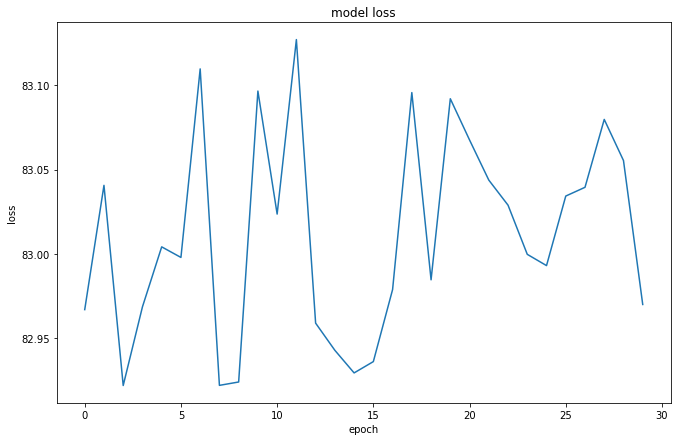

In [ ]:
plt.figure(figsize=(11,7))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### there is no better relation between epochs (0-30) and the loss of the model with 0.1 training_rate 